In [1]:
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
model = Sequential()

In [3]:
#inputlayer : apply filters
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3), 
                        activation='relu',
                   input_shape=(64, 64, 3)
                       ))

In [4]:
# pooling layer where we are doing maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))

In [5]:
#modification for increasing accuracy
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3), 
                        activation='relu',
                       ))

In [6]:
#modification for increasing accuracy
model.add(MaxPooling2D(pool_size=(2, 2)))

In [7]:
#layer inwhich we areconverting 2d/3d image to 1d image i.e flattening
model.add(Flatten())

In [8]:
# layer: appling relu to give positive output
# from here our hidden layerrs starts
model.add(Dense(units=128, activation='relu'))

In [9]:
#output layer : to provide binary output using sigmoid function
model.add(Dense(units=6, activation='softmax'))

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
from keras_preprocessing.image import ImageDataGenerator

In [12]:
#image augmentation
#url : https://keras.io/api/preprocessing/image/ 
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        'seg_train/',
        target_size=(64,64),
        batch_size=32,
        class_mode='categorical')
test_set = test_datagen.flow_from_directory(
        'seg_test/',
        target_size=(64,64),
        batch_size=32,
        class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [13]:
training_set.class_indices # to see classes of our dataset

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [18]:
#model.fit(
#        training_set,
#        steps_per_epoch=2300,
#        epochs=3,
#        validation_data=test_set,
#        validation_steps=12000)

In [ ]:
#model.save("cnn-placeimage_model.h5")   #save model

In [14]:
from keras.models import load_model
model=load_model("cnn-intel-image-model.h5")  #load model  <- this has run on 3 epochs with ~85% accuracy

In [15]:
from keras.preprocessing import image

In [35]:
test_image = image.load_img("seg_pred/14.jpg",target_size=(64,64))
#test_image = image.load_img("C:/Users/ASUS/Desktop/cat.jpg",target_size=(64,64))

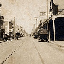

In [36]:
test_image #since this format is PIL or pillow so it can be printed

In [37]:
test_image = image.img_to_array(test_image)  #convert PIL image to numpy array

In [38]:
import numpy as np

In [39]:
test_image = np.expand_dims(test_image,axis=0)
#since keras uses tensor flow and for tensorflow it needs 4d image so we converted 3d image to 4d image using above

In [40]:
result = model.predict(test_image)

In [41]:
result

array([[0., 0., 0., 0., 0., 1.]], dtype=float32)

In [42]:
if result[0][0]==1:
    print("Buildings")
elif result[0][1]==1:
    print("Forest")
elif result[0][2]==1:
    print("Glacier")
elif result[0][3]==1:
    print("Mountain")
elif result[0][4]==1:
    print("Sea")
else:
    print("Street")

Street
